# COMP 424 Assignment 1

## Amir Abushanab - _260624419_

### Note: re-run the kernel to get the graphs to be all interactive and stuff. Also make sure you are using Python 3.x with the latest version of Jupyter for the best results :)

### Q1-a:

In [1]:
import queue

#Modify the inital state and goal state to test the code out ;)
initialState = [1, 4, 2, 5, 3, 0]
goalState = [0, 1, 2, 5, 4, 3]
operators = ["up", "down", "left", "right"]

class Node:

    def __init__(self, state, operator, depth, cost, parent):
        self.state = state
        self.operator = operator
        self.depth = depth
        self.cost = cost
        self.parent = parent

    #Useful gimmick for comparing nodes based on their state
    def __eq__(self, other):
        return self.state == other.state

def show_path (state, solution, solutionType= "Some Searching Algorithm"):

    """Displays the steps to the solution path given the initial state and solution steps"""

    def display_board(state):

        """Displays the given board state"""

        print("*******************")
        print("| ", state[0], " | ", state[1], " | ", state[2], " |")
        print("*******************")
        print("| ", state[3], " | ", state[4], " | ", state[5], " |")
        print("*******************")

    if solution is None:
        print("No solution path found")

    elif solution == [None]:
        print("The start node is the goal!")

    else:
        print("The execution for " + solutionType + " is as follows")
        print("Initial State:")
        new_state = state.copy()
        display_board(new_state)
        print()

        for stepNumber, step in enumerate(solution):
            print("Move ", stepNumber+1, ": ", step)
            new_state = move(new_state, step)
            display_board(new_state)
            print()
            
        print("Goal Reached!")
        print("-------------------")
        print()

def trace_path (node):

    """Returns a list that contains the path from the given node to the start node"""

    path = []
    tempNode = node

    while True:
        path.insert(0, tempNode.operator)

        if tempNode.depth == 1: #The starting node was reached
            break
        tempNode = tempNode.parent

    return path

def explore(node):

    """Returns a list of the next nodes it is possible to explore
    with priority given to switching lower numbers"""

    expandedNodes = []
    orderedOperators = check_priority(node.state)

    for operator in orderedOperators:
        expandedNode = Node(move(node.state, operator), operator, node.depth + 1, node.cost + 1, node)

        if expandedNode.state != None:
            expandedNodes.append(expandedNode)

    return expandedNodes

def check_priority(state):

    """Returns an order list of operators that gives priority
    to moving lower numbers in the given state"""

    tupleOperators = []
    orderedOperators = []
    position = state.index(0)

    try:
        up = state[position - 3]
    except IndexError: #The move is invalid so I can set the state to any number > 6
        up = 7
    tupleOperators.append((up, "up"))

    try:
        down = state[position + 3]
    except IndexError:
        down = 7
    tupleOperators.append((down, "down"))

    try:
        left = state[position - 1]
    except IndexError:
        left = 7
    tupleOperators.append((left, "left"))

    try:
        right = state[position + 1]
    except IndexError:
        right = 7
    tupleOperators.append((right, "right"))

    #Sort the possible moves in descending order
    tupleOperators.sort(key=lambda x: x[0])

    #Then add them to the final list
    for operator in tupleOperators:
        orderedOperators.append(operator[1])

    return orderedOperators

def move(state, direction):

    """Returns the a new state after moving the empty slot in the given state in the specified direction.
    If the requested direction is not possible, returns None."""

    tempState = state.copy()
    position = state.index(0)

    if direction == 'up':
        if position in [0, 1, 2]: #Top row can't be moved up
            return None

        else: # Move the piece up
            tempValue = tempState[position - 3]
            tempState[position - 3] = 0
            tempState[position] = tempValue
            return tempState

    if direction == 'down':
        if position in [3, 4, 5]: #Bottom row can't be moved down
            return None

        else: # Move the piece down
            tempValue = tempState[position + 3]
            tempState[position + 3] = 0
            tempState[position] = tempValue
            return tempState

    if direction == 'left':
        if position in [0, 3]: #Left column can't be moved left
            return None

        else: # Move the piece left
            tempValue = tempState[position - 1]
            tempState[position - 1] = 0
            tempState[position] = tempValue
            return tempState

    if direction == 'right':
        if position in [2, 5]: #Right column can't be moved right
            return None

        else: # Move the piece right
            tempValue = tempState[position + 1]
            tempState[position + 1] = 0
            tempState[position] = tempValue
            return tempState

def bfs(startState, goalState):

    """Returns the solution path from the starting state to the goal state by
    performing breadth first search on the possible actions"""

    nodeQueue = queue.Queue()
    visitedNodes = []
    nodeQueue.put(Node(startState, None, 0, 0, None))

    while True:

        if nodeQueue.qsize() == 0:
            return None

        node = nodeQueue.get()
        if node not in visitedNodes:
            visitedNodes.append(node)

        if node.state == goalState:
            return trace_path(node)

        #Explore the next set of nodes that have yet to be visited
        nextNodes = explore(node)

        for nextNode in nextNodes:
            if nextNode not in visitedNodes:
                nodeQueue.put(nextNode)



def dfs(startState, goalState, maxDepth = float('inf')):

    """Returns the solution path from the starting state to the goal state by
    performing depth first search on the possible actions"""

    nodeQueue = queue.LifoQueue()
    visitedNodes = []
    nodeQueue.put(Node(startState, None, 0, 0, None))

    while True:

        if nodeQueue.qsize() == 0:
            return None

        node = nodeQueue.get()
        if node not in visitedNodes:
            visitedNodes.append(node)

        if node.state == goalState:
            return trace_path(node)

        # If a state has not been explored yet and the max depth has not been exceeded, add it to the front of the queue
        if node.depth < maxDepth:
            possibleNodes = explore(node)
            nextNodes = [aNode for aNode in possibleNodes if aNode not in visitedNodes]

            for aNode in reversed(nextNodes):
                nodeQueue.put(aNode)


def uniform_cost_search(startState, goalState):

    """Returns the solution path from the starting state to the goal state by
    performing uniform cost search on the possible actions"""

    nodeQueue = queue.PriorityQueue()
    visitedNodes = []
    startNode = Node(startState, None, 0, 0, None)

    # Since I don't want to implement comparision methods for the Node Class, the node counter
    #  is a quick fix for comparing two nodes in the Priorityqueue
    nodeCounter = 0
    nodeQueue.put((startNode.cost, nodeCounter, startNode))

    while True:

        if nodeQueue.qsize() == 0:
            return None

        node = nodeQueue.get()[2]
        if node not in visitedNodes:
            visitedNodes.append(node)

        if node.state == goalState:
            return trace_path(node)

        nextNodes = explore(node)

        for nextNode in nextNodes:

            if nextNode not in visitedNodes:
                nodeCounter += 1
                nodeQueue.put((nextNode.cost, nodeCounter, nextNode))

def iterative_dfs(startState, goalState, maxDepth):

    """Returns the solution path from the starting state to the goal state by
    performing iterative depth first search on the possible actions"""

    for i in range(maxDepth):
        result = dfs(startState, goalState, i)

        if result != None:
            return result


In [2]:
#i)
resulti = bfs(initialState, goalState)
show_path(initialState, resulti, "BFS")

The execution for BFS is as follows
Initial State:
*******************
|  1  |  4  |  2  |
*******************
|  5  |  3  |  0  |
*******************

Move  1 :  left
*******************
|  1  |  4  |  2  |
*******************
|  5  |  0  |  3  |
*******************

Move  2 :  up
*******************
|  1  |  0  |  2  |
*******************
|  5  |  4  |  3  |
*******************

Move  3 :  left
*******************
|  0  |  1  |  2  |
*******************
|  5  |  4  |  3  |
*******************

Goal Reached!
-------------------



In [3]:
#ii)
resultii = dfs(initialState, goalState)
show_path(initialState, resultii, "DFS")

The execution for DFS is as follows
Initial State:
*******************
|  1  |  4  |  2  |
*******************
|  5  |  3  |  0  |
*******************

Move  1 :  up
*******************
|  1  |  4  |  0  |
*******************
|  5  |  3  |  2  |
*******************

Move  2 :  left
*******************
|  1  |  0  |  4  |
*******************
|  5  |  3  |  2  |
*******************

Move  3 :  left
*******************
|  0  |  1  |  4  |
*******************
|  5  |  3  |  2  |
*******************

Move  4 :  down
*******************
|  5  |  1  |  4  |
*******************
|  0  |  3  |  2  |
*******************

Move  5 :  right
*******************
|  5  |  1  |  4  |
*******************
|  3  |  0  |  2  |
*******************

Move  6 :  up
*******************
|  5  |  0  |  4  |
*******************
|  3  |  1  |  2  |
*******************

Move  7 :  right
*******************
|  5  |  4  |  0  |
*******************
|  3  |  1  |  2  |
*******************

Move  8 :  down
***************

|  0  |  2  |  1  |
*******************
|  5  |  3  |  4  |
*******************

Move  78 :  down
*******************
|  5  |  2  |  1  |
*******************
|  0  |  3  |  4  |
*******************

Move  79 :  right
*******************
|  5  |  2  |  1  |
*******************
|  3  |  0  |  4  |
*******************

Move  80 :  up
*******************
|  5  |  0  |  1  |
*******************
|  3  |  2  |  4  |
*******************

Move  81 :  left
*******************
|  0  |  5  |  1  |
*******************
|  3  |  2  |  4  |
*******************

Move  82 :  down
*******************
|  3  |  5  |  1  |
*******************
|  0  |  2  |  4  |
*******************

Move  83 :  right
*******************
|  3  |  5  |  1  |
*******************
|  2  |  0  |  4  |
*******************

Move  84 :  right
*******************
|  3  |  5  |  1  |
*******************
|  2  |  4  |  0  |
*******************

Move  85 :  up
*******************
|  3  |  5  |  0  |
*******************
|  2  |  4  |  1 

In [4]:
#iii)
resultiii = uniform_cost_search(initialState, goalState)
show_path(initialState, resultiii, "Uniform Cost Search")

The execution for Uniform Cost Search is as follows
Initial State:
*******************
|  1  |  4  |  2  |
*******************
|  5  |  3  |  0  |
*******************

Move  1 :  left
*******************
|  1  |  4  |  2  |
*******************
|  5  |  0  |  3  |
*******************

Move  2 :  up
*******************
|  1  |  0  |  2  |
*******************
|  5  |  4  |  3  |
*******************

Move  3 :  left
*******************
|  0  |  1  |  2  |
*******************
|  5  |  4  |  3  |
*******************

Goal Reached!
-------------------



In [5]:
#iv)
resultiv = iterative_dfs(initialState, goalState, 42)
show_path(initialState, resultiv, "Iterative DFS")

The execution for Iterative DFS is as follows
Initial State:
*******************
|  1  |  4  |  2  |
*******************
|  5  |  3  |  0  |
*******************

Move  1 :  left
*******************
|  1  |  4  |  2  |
*******************
|  5  |  0  |  3  |
*******************

Move  2 :  up
*******************
|  1  |  0  |  2  |
*******************
|  5  |  4  |  3  |
*******************

Move  3 :  left
*******************
|  0  |  1  |  2  |
*******************
|  5  |  4  |  3  |
*******************

Goal Reached!
-------------------



### Q1-b:

Yes the heuristic would still be admissable, as $$h(n) = k + \sum_{i=1}^6 (|x_i(s) - X_i| + |y_i(s) - Y_i|)$$ where k is the value of the piece to be moved, $x_i(s), y_i(s)$ are the coordinates of the tile in the current state, and $X_i, Y_i$ are the coordinates of the tile in the goal state. Therefore it's trivial that $h(n) \leq h^*(n) \forall n$ (where $h^*(n)$ is the shortest path to the goal) and $h(g) = 0$ for the goal state. 

### Q1-c:

For a heuristic $h_2$ to dominate a heuristic $h_1$, the following property must be satisfied: $h_2(n) \geq h_1(n) \forall n$ The following heuristic provides a tighter constraint that satisfies the property, $$h(n) = \sum_{i=1}^6 (|x_i(s) - X_i| + |y_i(s) - Y_i|) + S(n)$$ where $S(n) = 1$ if two tiles $x_j$ and $x_k$ are in a linear conflict; i.e  $x_i, x_j, X_i, X_j$ are all in the same line but $x_j$ is to the right of $x_i$ and $X_j$, and vice versa, and $S(n) = 0$ otherwise. The intuition behind this is that the tile needs to be moved 2 extra steps to reach it's goal.

### Q1-d:

No, the heuristic would not be admissable, as the constraint $h(n) \leq h^* (n)$ is violated, for example when the puzzle has state $[5, 1, 2, 3, 4, 0]$

### Q2-a:

A tree with n nodes that have only 1 child and where the goal is the _n_-th node will be explored in _O(n)_ time by DFS, but will take _O(n^2)_ with iterative DFS

### Q2-b:

When the cost $g(n) = k \ \forall n$ or when or when $maxdepth = 2$ then Uniform Cost Search is just BFS.

### Q2-c:

When $f(n) = -depth(n) \ \forall n$ or when the space we are exploring has only nodes with 1 child then Best First Tree search is just DFS.

### Q2-d:

When $h(n) = 0 \ \forall n$ then $f(n) = g(n)$ and so A\* search becomes Uniform Cost Search.

### Q3-a:

<IPython.core.display.Javascript object>


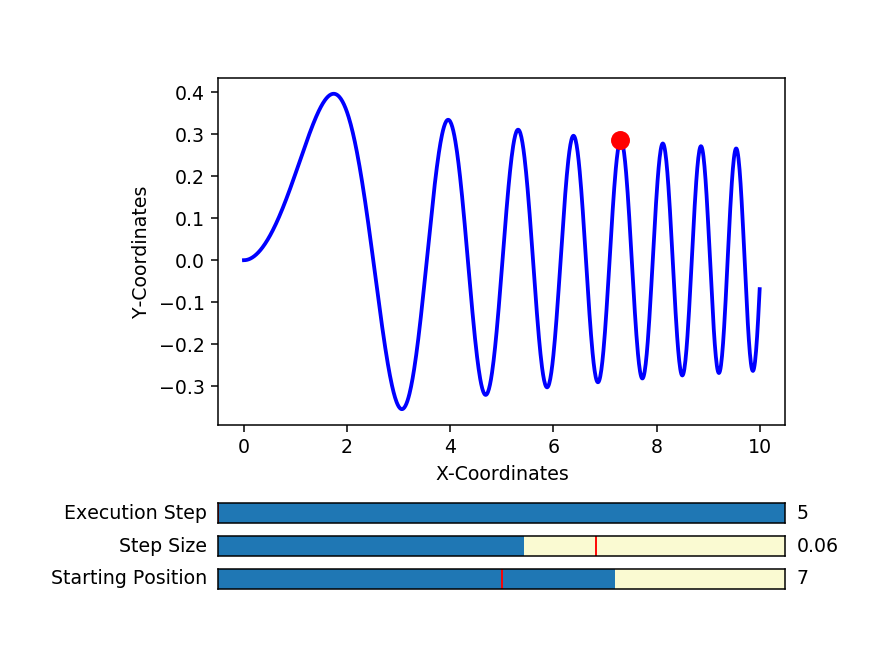

C:\Users\Amir\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons
from functools import partial
%matplotlib notebook
# First I create an array that contains all the elements at intervals of the smallest step size (since anything less
# than that would be pointless)

x_coordinates = []
y_coordinates = []

for x in np.arange(0, 10.01, 0.01):
    x = round(np.asscalar(x), 2) #Converts the np float64 type to a regular python float with 2 decimal places
    x_coordinates.append(x)
    y_coordinates.append(math.sin((math.pow(x,2))/2)/math.log2(x+4))

def maximum(num1, num2):

    """Compares two numbers and returns the greater one (how is this not a default python function!?)"""

    if num1 > num2:
        return num1
    else:
        return num2

def gradient_ascent(x_coordinates, y_coordinates, startStep, stepSize):

    """Returns an array that shows the execution of a gradient ascent algorithm (it contains the indices of the
    coordinates) given a set of x and y coordinates, a startStep, and a stepSize"""

    # Declare variables and add the starting position to the execution steps
    index = x_coordinates.index(startStep)
    executionSteps = []
    position = x_coordinates[index]
    executionSteps.append(index)

    while True :

        # The try blocks are necessary if you reach the ends of the graph, in which case if the end is already a
        # local maximum then return the execution steps, otherwise try to go in the opposite direction
        try:
            n1Index = x_coordinates.index(round(position + stepSize, 2))
        except ValueError:
            nIndex = x_coordinates.index(round(position - stepSize, 2))
            if maximum(y_coordinates[nIndex], y_coordinates[index]) == y_coordinates[index]:
                return executionSteps
            else:
                index = nIndex
                position = x_coordinates[nIndex]
                executionSteps.append(index)
                continue
        try:
            n2Index = x_coordinates.index(round(position - stepSize, 2))
        except ValueError:
            nIndex = x_coordinates.index(round(position + stepSize, 2))
            if maximum(y_coordinates[nIndex], y_coordinates[index]) == y_coordinates[index]:
                return executionSteps
            else:
                index = nIndex
                position = x_coordinates[nIndex]
                executionSteps.append(index)
                continue

        #Set the successor index to the value of the larger successor
        if maximum(y_coordinates[n1Index], y_coordinates[n2Index]) == y_coordinates[n1Index]:
            successorIndex = n1Index
        else:
            successorIndex = n2Index
        
        #If the successor large than the current value, move to the new position, otherwise you've reached a local optimum
        if y_coordinates[successorIndex] > y_coordinates[index]:
            index = successorIndex
            position = x_coordinates[successorIndex]
            executionSteps.append(index)

        else:
            return executionSteps

globalExecutionSteps = gradient_ascent(x_coordinates, y_coordinates, 7, 0.1)

#The following code is all basically to draw a pretty graph and make it interactive, too lazy/pressed for time to comment

def set_slider(s,val):

    """Returns a discrete integer value given a slider's floating point input"""
    
    s.val = round(val)
    s.poly.xy[2] = s.val,1
    s.poly.xy[3] = s.val,0
    s.valtext.set_text(s.valfmt % s.val)

fig = plt.figure(num = "Gradient Ascent")
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
plt.subplots_adjust(left=0.25, bottom=0.35)
ax1.plot(x_coordinates, y_coordinates, color='blue', lw=2)
ax2.plot(x_coordinates[globalExecutionSteps[0]], y_coordinates[globalExecutionSteps[0]], 'ro', markersize=9)
ax1.set_xlabel('X-Coordinates')
ax1.set_ylabel('Y-Coordinates')
axcolor = 'lightgoldenrodyellow'
axPosition = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axStepSize = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axExecution = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
positionSlider = Slider(axPosition, 'Starting Position', 0.0, 10.0, valinit=5, valfmt="%0.0f")
positionSlider.on_changed(partial(set_slider, positionSlider))
stepSizeSlider = Slider(axStepSize, 'Step Size', 0.01, 0.1, valinit=0.07)
executionSlider = Slider(axExecution, 'Execution Step', 0, len(globalExecutionSteps) - 1, valinit=0, valfmt="%i")
executionSlider.on_changed(partial(set_slider, executionSlider))

def update_params(val):
    
    startingPosition = positionSlider.val
    stepSize = stepSizeSlider.val
    global globalExecutionSteps
    globalExecutionSteps = gradient_ascent(x_coordinates, y_coordinates, startingPosition, stepSize)
    executionSlider.reset()
    valmax = len(globalExecutionSteps) - 1
    executionSlider.valmax = valmax
    executionSlider.ax.set_xlim(0, valmax)
    ax2.clear()
    ax1.plot(x_coordinates, y_coordinates, color='blue', lw=2)
    ax2.plot(x_coordinates[globalExecutionSteps[0]], y_coordinates[globalExecutionSteps[0]], 'ro', markersize=9)
    ax1.set_xlabel('X-Coordinates')
    ax1.set_ylabel('Y-Coordinates')
    fig.canvas.draw_idle()
    
positionSlider.on_changed(update_params)
stepSizeSlider.on_changed(update_params)

def update_execution(val):
    
    executionStep = int(executionSlider.val)
    global globalExecutionSteps
    ax2.clear()
    ax1.plot(x_coordinates, y_coordinates, color='blue', lw=2)
    ax2.plot(x_coordinates[globalExecutionSteps[executionStep]], y_coordinates[globalExecutionSteps[executionStep]], 'ro', markersize=9)
    ax1.set_xlabel('X-Coordinates')
    ax1.set_ylabel('Y-Coordinates')
    
executionSlider.on_changed(update_execution)
plt.show()

While a larger step size will take less steps to ascend, it will not always converge at the local optimum as it sometimes overshoots. On the other hand, a smaller step size will converge but takes more steps, so the ideal is a step-size somewhere in the middle (in this case 0.06).

Note that regardless of step size, where you start may still get you stuck in a local optimum (i.e if you start at 10). Just by looking at the plotted graph it's better to start near the peaks (in this case 2 is the ideal)

### Q3-b:

In [7]:
import random

def random_schedule(temprature, alpha):

    """Returns a value that randomly drops by a factor of alpha or alpha^2"""

    if random.random() > 0.5: return temprature*alpha
    else: return temprature*alpha*alpha

def exp_schedule(temprature, alpha):

    """Returns a value that drops by a factor of alpha"""

    return temprature*alpha

def subtract_schedule(temprature, alpha):

    """Returns a value that drops by a factor of alpha"""

    return temprature - temprature*alpha

def simulated_annealing(x_coordinates, y_coordinates, schedule, stepSize = 0.07, startStep = 1.0, temprature = 1,
                        alpha = 0.999, maxStationary = 500):

    """Returns an array that shows the execution of a gradient ascent algorithm (it contains the indices of the
    coordinates) as well as the peak it found, given at least a set of x and y coordinates as well as an
    annealing schedule"""

    index = x_coordinates.index(startStep)
    executionSteps = []
    position = x_coordinates[index]
    executionSteps.append(index)
    peak = -float('inf')
    peakIndex = 0
    stationaryMoves = 0

    while True:

        #Choose a random neighbour to visit
        if random.random() >= 0.5:
            try:
                nIndex = x_coordinates.index(round(position + stepSize, 2))
            except ValueError:
                nIndex = x_coordinates.index(round(position - stepSize, 2))
        else:
            try:
                nIndex = x_coordinates.index(round(position - stepSize, 2))
            except ValueError:
                nIndex = x_coordinates.index(round(position + stepSize, 2))

        if y_coordinates[nIndex] > peak:
            stationaryMoves = 0
            peakIndex = nIndex
            peak = y_coordinates[nIndex]
        else:
            stationaryMoves += 1

        if y_coordinates[nIndex] > y_coordinates[index]:
            index = nIndex
            position = x_coordinates[index]
            executionSteps.append(index)

        else:
            if random.random() <= math.exp(-(y_coordinates[index] - y_coordinates[nIndex])/temprature):
                index = nIndex
                position = x_coordinates[nIndex]
                executionSteps.append(index)
                temprature = schedule(temprature, alpha)

        # Make the algorithm terminate if the temprature falls below or we haven't moved in X steps
        # (with the second condition as more of a failsafe/sanity check)
        if temprature <= 1.0000000000000004e-05 or (stationaryMoves > maxStationary):
            return (peakIndex, executionSteps)


result = simulated_annealing(x_coordinates,y_coordinates, exp_schedule, stepSize=0.06, startStep= 3, alpha= 0.5)
print("Peak Coordinates: ", x_coordinates[result[0]], ", ", y_coordinates[result[0]])
print("Number of Steps: ", len(result[1]))

Peak Coordinates:  1.74 ,  0.39601588909932467
Number of Steps:  46


With simulated annealing, the same properties as gradient ascent appear, and the more lax the annealing schedule (i.e the longer it takes the temprature to to fall below some lower bound) the longer it takes to converge, but the more likely you are to converge at the global maximum. For example, the default parameters in the above code (stepSize= 0.07, exp_schedule, startStep= 3, alpha= 0.5) will sometimes converge at the global optimum, sometimes at the local (you may have to run it a few times).

<IPython.core.display.Javascript object>


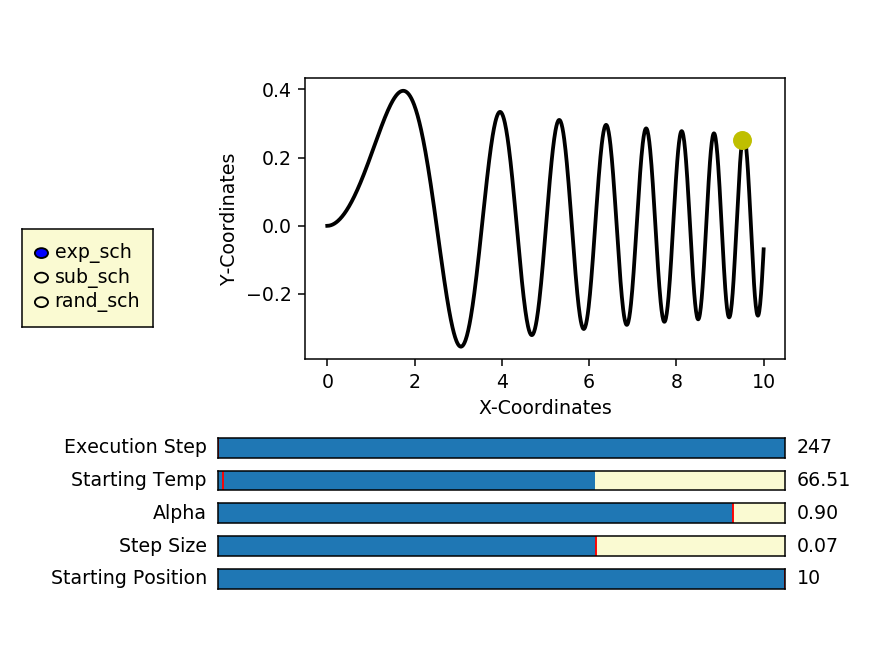

C:\Users\Amir\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [10]:
#Just more code to produce a chique interactive graph

fig2 = plt.figure(num= 'Simulated Annealing')
ax3 = fig2.add_subplot(111)
ax4 = fig2.add_subplot(111)
plt.subplots_adjust(left=0.35, bottom=0.45)
ax3.plot(x_coordinates, y_coordinates, color='black', lw=2)
ax4.plot(x_coordinates[result[1][0]], y_coordinates[result[1][0]], 'yo', markersize=9)
ax3.set_xlabel('X-Coordinates')
ax3.set_ylabel('Y-Coordinates')
axcolor = 'lightgoldenrodyellow'
ax3Position = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
ax3StepSize = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
ax3Execution = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)
axStartTemp = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axAlpha = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)

positionSlider = Slider(ax3Position, 'Starting Position', 0.0, 10.0, valinit=10, valfmt="%0.0f")
positionSlider.on_changed(partial(set_slider, positionSlider))
stepSizeSlider = Slider(ax3StepSize, 'Step Size', 0.01, 0.1, valinit=0.07)
executionSlider = Slider(ax3Execution, 'Execution Step', 0, len(result[1]) - 1, valinit=0, valfmt="%i")
executionSlider.on_changed(partial(set_slider, executionSlider))
startTempSlider = Slider(axStartTemp, 'Starting Temp', 0.1, 100, valinit=1)
alphaSlider = Slider(axAlpha, 'Alpha', 0.01, 0.99, valinit=0.9)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('exp_sch', 'sub_sch', 'rand_sch'), active=0)

def update_anneal_params(val):

    startingPosition = positionSlider.val
    stepSize = stepSizeSlider.val
    startingTemp = startTempSlider.val
    alpha = alphaSlider.val
    global result
    result = simulated_annealing(x_coordinates,y_coordinates, exp_schedule, stepSize=stepSize,
                                 startStep= startingPosition, temprature=startingTemp, alpha=alpha)
    executionSlider.reset()
    valmax = len(result[1]) - 1
    executionSlider.valmax = valmax
    executionSlider.ax.set_xlim(0, valmax)
    ax4.clear()
    ax3.plot(x_coordinates, y_coordinates, color='black', lw=2)
    ax3.plot(x_coordinates[result[0]], y_coordinates[result[0]], 'yo', markersize=9)
    ax3.set_xlabel('X-Coordinates')
    ax3.set_ylabel('Y-Coordinates')
    fig2.canvas.draw_idle()

positionSlider.on_changed(update_anneal_params)
stepSizeSlider.on_changed(update_anneal_params)
startTempSlider.on_changed(update_anneal_params)
alphaSlider.on_changed(update_anneal_params)

def update_anneal_execution(val):

    executionStep = int(executionSlider.val)
    global result
    executionarray = result[1]
    ax4.clear()
    ax3.plot(x_coordinates, y_coordinates, color='black', lw=2)
    ax4.plot(x_coordinates[executionarray[executionStep]], y_coordinates[executionarray[executionStep]], 'yo', markersize=9)
    ax3.set_xlabel('X-Coordinates')
    ax3.set_ylabel('Y-Coordinates')

executionSlider.on_changed(update_anneal_execution)

def schedulefunc(label):
    global result
    if label == 'exp_sch':
        result = simulated_annealing(x_coordinates,y_coordinates, exp_schedule, stepSize=stepSizeSlider.val,
                                 startStep= positionSlider.val, temprature= startTempSlider.val, alpha=alphaSlider.val)
    elif label == 'sub_sch':
        result = simulated_annealing(x_coordinates, y_coordinates, subtract_schedule, stepSize=stepSizeSlider.val,
                                     startStep=positionSlider.val, temprature=startTempSlider.val,
                                     alpha=alphaSlider.val)
    elif label == 'rand_sch':
        result = simulated_annealing(x_coordinates, y_coordinates, random_schedule, stepSize=stepSizeSlider.val,
                                     startStep=positionSlider.val, temprature=startTempSlider.val,
                                     alpha=alphaSlider.val)

    executionSlider.reset()
    valmax = len(result[1]) - 1
    executionSlider.valmax = valmax
    executionSlider.ax.set_xlim(0, valmax)
    ax4.clear()
    ax3.plot(x_coordinates, y_coordinates, color='black', lw=2)
    ax3.plot(x_coordinates[result[0]], y_coordinates[result[0]], 'yo', markersize=9)
    ax3.set_xlabel('X-Coordinates')
    ax3.set_ylabel('Y-Coordinates')

radio.on_clicked(schedulefunc)

plt.show()

### Q4-a:

Variables: $\{R_1,...,R_k\}$

Domain: $\{1,..., n\}$ (Columns in an $n x n$ board)

Constraints: $R_i \neq R_j$ (Cannot be in the same row)

Note that $R_i$ and $R_j$ cannot be placed in the same column to begin with, so a second constraint is not necessary

### Q4-b:

| Rook          | Assign $R_1$ = 1 | Assign $R_2 =2$ | Assign $R_3 = 3$ |
|:-------------:|:-------------:|:-------------:|:-------------:|
| $R_1$         | **1**         | 1             | 1             |
| $R_2$         | 2,3           | **2**         | 2             |
| $R_3$         | 2,3           | 3             | **3**         |

### Q4-c:

| Rook          | Assign $R_1$ = 1 | Assign $R_2 =2$ |
|:-------------:|:-------------:|:-------------:|
| $R_1$         | **1**         | 1             |
| $R_2$         | 2,3           | **2**         |
| $R_3$         | 2,3           | **3** (By forward checking)| 